In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
warnings.filterwarnings('ignore') 


In [4]:
import pandas as pd

train = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")
test = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")

# To know the number of columns and rows in the train DataFrame
print(train.shape)


(418, 2)


In [5]:
train.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
train.isnull().sum() 


PassengerId    0
Survived       0
dtype: int64

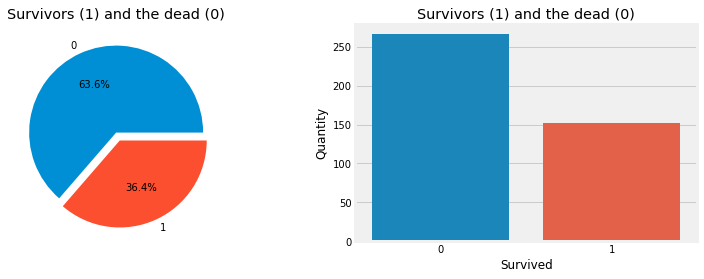

In [7]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train['Survived'].value_counts().plot.pie( 
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot('Survived', data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show() 


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in the DataFrame
print(train.columns)

# Plotting the graphs only if the columns exist in the DataFrame
if 'Sex' in train.columns and 'Survived' in train.columns:
    f, ax = plt.subplots(1, 2, figsize=(12, 4))
    train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
    ax[0].set_title('Survivors by sex')
    sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
    ax[1].set_ylabel('Quantity')
    ax[1].set_title('Survived (1) and deceased (0): men and women')
    plt.show()
else:
    print("The required columns 'Sex' and/or 'Survived' do not exist in the DataFrame.")




Index(['PassengerId', 'Survived'], dtype='object')
The required columns 'Sex' and/or 'Survived' do not exist in the DataFrame.


In [14]:
import pandas as pd

# Load the datasets
train = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")
test = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")

# Check if 'Cabin' column exists in train and test DataFrames
if 'Cabin' in train.columns:
    # Create a new column "CabinBool" in both train and test datasets
    train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
    test["CabinBool"] = (test["Cabin"].notnull().astype('int'))
    
    # Drop the 'Cabin' column from train and test datasets
    train = train.drop(['Cabin'], axis=1)
    test = test.drop(['Cabin'], axis=1)
else:
    print("The 'Cabin' column does not exist in the DataFrame.")

# Print the updated DataFrame
print(train.head())
print(test.head())



The 'Cabin' column does not exist in the DataFrame.
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [19]:
import pandas as pd

# Load the datasets
train = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")
test = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")

# Check if 'Survived' column exists in train and test DataFrames
if 'Survived' in train.columns:
    # Drop the 'Survived' column from train and test datasets
    train = train.drop(['Survived'], axis=1)
    test = test.drop(['Survived'], axis=1)
else:
    print("The 'Survived' column does not exist in the DataFrame.")

# Print the updated DataFrame
print(train.head())
print(test.head())



   PassengerId
0          892
1          893
2          894
3          895
4          896
   PassengerId
0          892
1          893
2          894
3          895
4          896


In [20]:
# replacing the missing values in 
# the Embarked feature with S 
train = train.fillna({"Embarked": "S"}) 


In [29]:
import pandas as pd

# Load the datasets
train = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")
test = pd.read_csv("C:/Users/manoj/Downloads/gender_submission.csv")

# Check if 'Age' column exists in train and test DataFrames
if 'Age' in train.columns:
    # Handling missing values in the 'Age' column
    train["Age"] = train["Age"].fillna(-0.5)
    test["Age"] = test["Age"].fillna(-0.5)

    # Defining bins and labels for age groups
    bins = [-1, 0, 5, 12, 18, 24, 35, 60, float('inf')]
    labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

    # Creating 'AgeGroup' column based on age categories
    train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
    test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)
else:
    print("The 'Age' column does not exist in the DataFrame.")

# Print the updated DataFrame
print(train.head())
print(test.head())




The 'Age' column does not exist in the DataFrame.
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [30]:
from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId 
# column from the trainset 
predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
	predictors, target, test_size=0.2, random_state=0) 


In [31]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 


ValueError: at least one array or dtype is required